<a href="https://colab.research.google.com/github/Rajeshprd/Uber_Analysis/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing modules and dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_uber = pd.read_csv("/content/Uber Request Data (1).csv")

##Description of dataset

In [5]:
df_uber.shape

(6745, 6)

In [6]:
df_uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
df_uber.head() 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [8]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df_uber.describe(include = 'all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 17:57,12/7/2016 21:53
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


##Finding the null values

In [10]:
df_uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [11]:
(df_uber.isnull().sum()/df_uber.shape[0])*100    #percentage of null values in a particular rows

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [13]:
print(df_uber['Request timestamp'].dtypes)


object


In [14]:
df_uber["Request timestamp"] = df_uber["Request timestamp"].str.replace("/","-")
df_uber["Request timestamp"] = pd.to_datetime(df_uber["Request timestamp"],dayfirst=True)
df_uber["Drop timestamp"] = df_uber["Drop timestamp"].str.replace("/","-")
df_uber["Drop timestamp"] = pd.to_datetime(df_uber["Drop timestamp"],dayfirst=True)                                                
df_uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


###Creating a R_hr and R_day columns with hour and day

In [15]:
df_uber["R_hr"] = df_uber["Request timestamp"].dt.hour
df_uber["R_day"] = df_uber["Request timestamp"].dt.day
df_uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [18]:
df_uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,23,15


In [19]:
df_uber.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
R_hr                          int64
R_day                         int64
dtype: object

###Creating a countpolt with data df_uber using seaborn

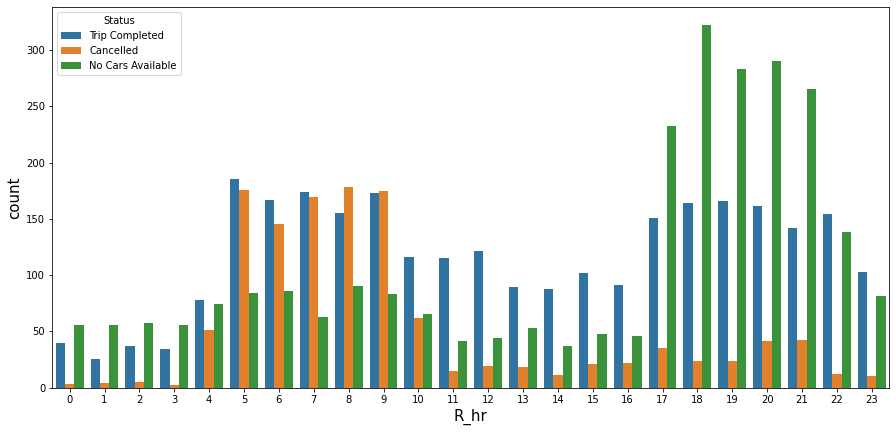

In [22]:
plt.figure(figsize=(15,7))
plt.xlabel('xlabel',fontsize=15)
plt.ylabel('ylabel',fontsize=15)
sns.countplot(x="R_hr", data=df_uber, hue="Status",)


###factorplot using seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


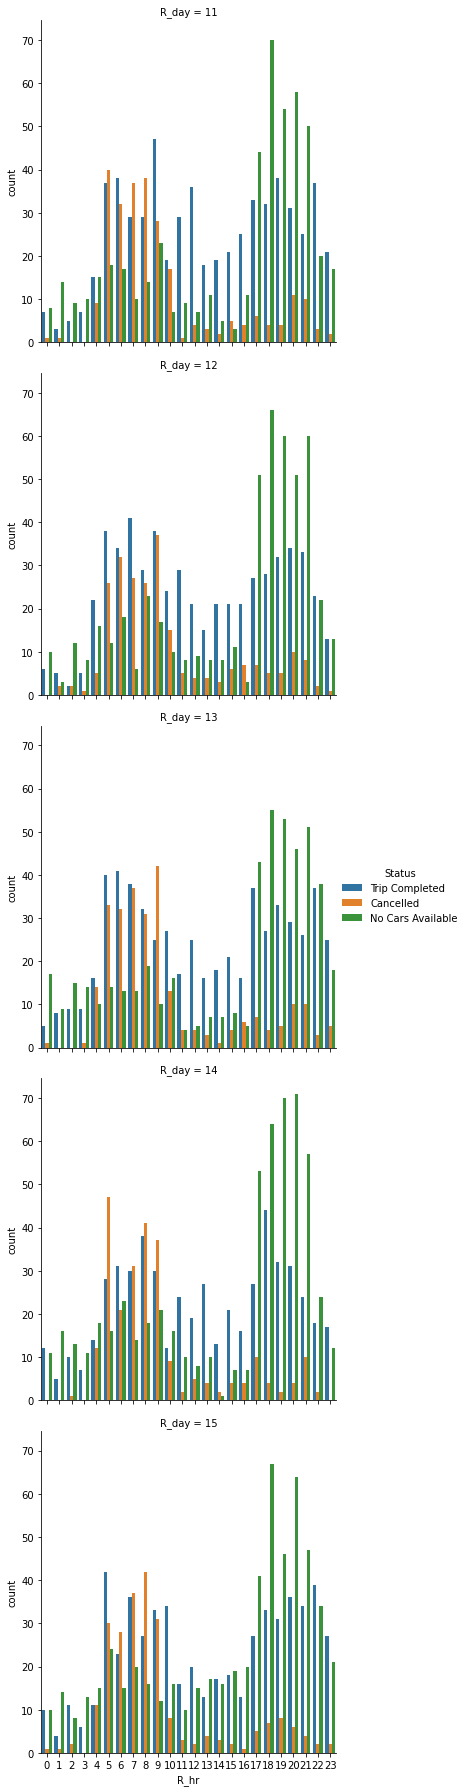

In [24]:
sns.factorplot(data=df_uber, x="R_hr", row="R_day", hue="Status", kind="count")


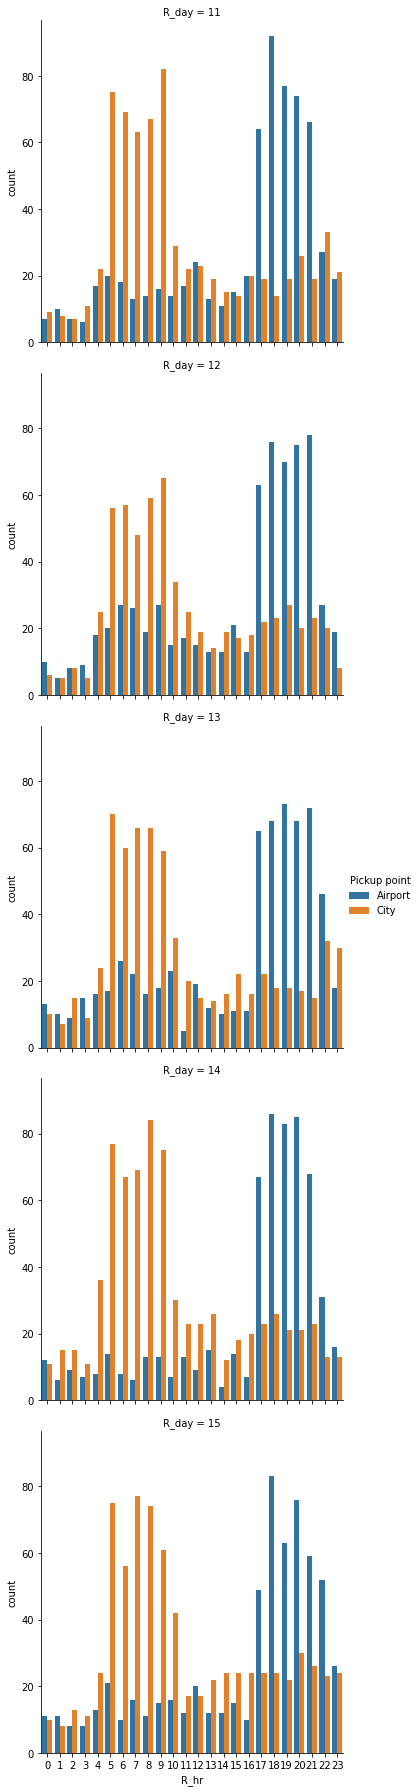

In [26]:

sns.catplot(x="R_hr",row="R_day",hue="Pickup point",data=df_uber,kind="count")


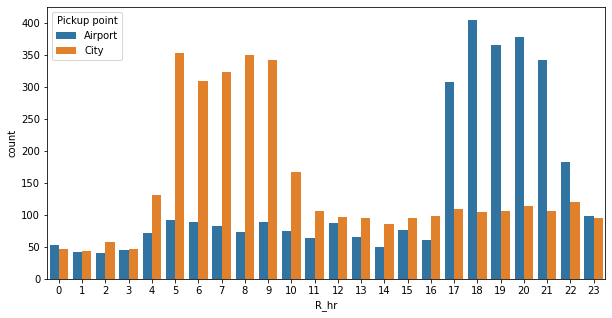

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_uber,x='R_hr', hue='Pickup point')

###Creating a new column Time slot in given data df_uber

In [27]:
df_uber["Time Slot"] = 0
df_uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [30]:
j=0
for i in df_uber["R_hr"]:
    if i<5:
        df_uber["Time Slot"][j]="Pre_Morning"
    elif 5<=i<10:
        df_uber["Time Slot"][j]="Morning_Rush"  
    elif 10<=i<17:
        df_uber["Time Slot"][j]="Day_Time"
    elif 17<=i<22:
        df_uber["Time Slot"][j]="Evening_Rush"
    else:
        df_uber["Time Slot"][j]="Late_Night"
    j=j+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

In [31]:
df_uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


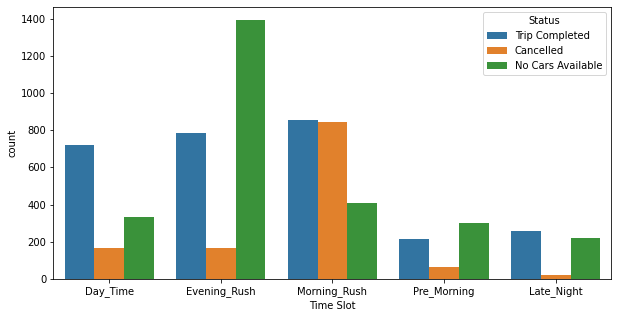

In [32]:
plt.figure(figsize=(10,5))
plt.xlabel('xlabel',fontsize=10)
plt.ylabel('ylabel',fontsize=10)
sns.countplot(x="Time Slot",data=df_uber,hue="Status")


In [33]:
df_uber_morning_rush=df_uber[df_uber['Time Slot']=='Morning_Rush']
df_uber_morning_rush['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [34]:
df_uber_evening_rush=df_uber[df_uber['Time Slot']=='Evening_Rush']


In [35]:
df_uber_day_time_rush=df_uber[df_uber['Time Slot']=='Day_Time']


In [36]:
df_uber_pre_morning_rush=df_uber[df_uber['Time Slot']=='Pre_Morning']


In [37]:
df_uber_late_night_rush=df_uber[df_uber['Time Slot']=='Late_Night']

###Severity of problem by location in morning rush

In [38]:
df_uber_morning_rush.groupby(by=['Status'])['Pickup point'].value_counts()


Status             Pickup point
Cancelled          City            820
                   Airport          23
No Cars Available  City            385
                   Airport          21
Trip Completed     City            472
                   Airport         382
Name: Pickup point, dtype: int64

In [40]:
df_uber_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day,Time Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


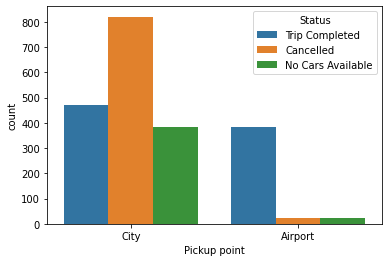

In [39]:
sns.countplot(x='Pickup point',hue='Status',data=df_uber_morning_rush,)


###completion rate of trip in city

In [41]:
total_city = df_uber_morning_rush.loc[(df_uber_morning_rush["Pickup point"]=="City")].shape[0]
completed_city = df_uber_morning_rush.loc[(df_uber_morning_rush["Pickup point"]=="City") & (df_uber_morning_rush["Status"]=="Trip Completed")].shape[0]
print('Completion Rate: ', (completed_city/total_city)*100)

Completion Rate:  28.14549791293977


###completion rate of trip in airport in morning_rush

In [43]:
total_airport = df_uber_morning_rush.loc[(df_uber_morning_rush["Pickup point"]=="Airport")].shape[0]
completed_airport = df_uber_morning_rush.loc[(df_uber_morning_rush["Pickup point"]=="Airport") & (df_uber_morning_rush["Status"]=="Trip Completed")].shape[0]
print('Completion Rate: ', (completed_airport/total_airport)*100)

Completion Rate:  89.67136150234741


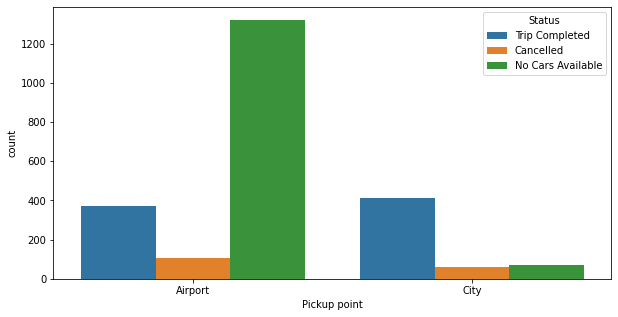

In [46]:
df_uber_evening_rush=df_uber[df_uber['Time Slot']=='Evening_Rush']
plt.figure(figsize=(10,5))
sns.countplot(x="Pickup point",hue="Status",data=df_uber_evening_rush)
plt.show()

###Cancelled booking of cars in evening_rush in city

In [47]:
df_uber_city_cancelled=df_uber_evening_rush.loc[(df_uber_evening_rush["Pickup point"]=="City") & (df_uber_evening_rush["Status"]=="Cancelled")]
df_uber_city_cancelled.shape[0]

60

###Cancelled booking of cars in evening_rush at airport

In [48]:
df_uber_airport_cancelled=df_uber_evening_rush.loc[(df_uber_evening_rush["Pickup point"]=="Airport") & (df_uber_evening_rush["Status"]=="Cancelled")]
df_uber_airport_cancelled.shape[0]

106

##Final Conclusion
1. Overall cars availability is very poor at both city and airport location
2. During Pre Morning Rush cars availability is poor at both city and airport
location and number of trip cancellation is higher at city location.
3. During Morning Rush Cacellation is high
4. In day time trip completion is good but availabilty of cars in city location is
less
5. In evening Rush cars avalabilty is less but there is less effect on cencellation.
6. Cars availability during late night should be increased